In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Locale settings
import locale
# Set to German locale to get comma decimal seperator
# Check with "locale -a" if "de_DE.utf8" is installed on your system
# Installation guide: https://ubuntuforums.org/showthread.php?t=196414
locale.setlocale(locale.LC_NUMERIC, "de_DE.utf8")

import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import rgb2hex
from pathlib import Path

# Tell matplotlib to use the locale
plt.rcParams["axes.formatter.use_locale"] = True

In [2]:
# Plot parameters
# Style
style = "whitegrid"
# Figure sizes
standard_sizes = {
    "a4portrait": (8.27, 11.69),
    "a4landscape": (11.69, 8.27),
    "a5portrait": (5.8, 8.3),
    "a5landscape": (8.3, 5.8),
}
# Font parameters
font = "Latin Modern Roman"
font_scale = 1.5
# Figure aesthetics
grid_linestyle = "--"
yticks = True
xticks = True

In [3]:
# Colors
def RGB_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return "#%02x%02x%02x" % (red, green, blue)

def rgb_to_RGB(rgb_tuple):
    return tuple(
        [int(round(255*val, 0)) for val in rgb_tuple])

palette = sns.color_palette("colorblind")


rgb_grid = (200, 200, 200)
rgb_labels = (0, 0, 0)


hex_grid = RGB_to_hex(*rgb_grid)
hex_labels = RGB_to_hex(*rgb_labels)

print("="*10, "COLOR PALETTE", "="*10)

for color in palette:
    print(f"HEX: {rgb2hex(color)} --> RGB: {rgb_to_RGB(color)}")
    
print("\n", "="*10, "GRID", "="*10)
print(f"HEX: {hex_grid} --> RGB: {rgb_grid}")

print("\n", "="*10, "LABELS", "="*10)
print(f"HEX: {hex_labels} --> RGB: {rgb_labels}")

========== COLOR PALETTE ==========
HEX: #0173b2 --> RGB: (1, 115, 178)
HEX: #de8f05 --> RGB: (222, 143, 5)
HEX: #029e73 --> RGB: (2, 158, 115)
HEX: #d55e00 --> RGB: (213, 94, 0)
HEX: #cc78bc --> RGB: (204, 120, 188)
HEX: #ca9161 --> RGB: (202, 145, 97)
HEX: #fbafe4 --> RGB: (251, 175, 228)
HEX: #949494 --> RGB: (148, 148, 148)
HEX: #ece133 --> RGB: (236, 225, 51)
HEX: #56b4e9 --> RGB: (86, 180, 233)

 ========== GRID ==========
HEX: #c8c8c8 --> RGB: (200, 200, 200)

 ========== LABELS ==========
HEX: #000000 --> RGB: (0, 0, 0)


In [4]:
# Set seaborn parameters
rc_theme = {
    "grid.linestyle":grid_linestyle,
    "ytick.left":yticks,
    "xtick.bottom":xticks,
    "ytick.color":hex_grid,
    "ytick.labelcolor":hex_labels,
    "xtick.color":hex_grid,
    "xtick.labelcolor":hex_labels,
    "grid.color":hex_grid,
    "patch.edgecolor":"black",
}

sns.set_theme(
    style=style, font=font, font_scale=font_scale, palette=palette, rc=rc_theme)

# Doing

In [5]:
data_dir = Path(
    "/home/kilian/mounts/rli/Daten_flexibel_02/open_bea_calculations_kh/"
    "open_bea_calculations_v4/concated_curtailment_results/worst_day_data"
)

grid_ids = [176, 177, 1056, 1690, 1811, 2534]
strategies = ["dumb", "reduced", "residual"]
storage_system = [
    "edisgo_files",
    "edisgo_files_with_solar_storage_full_year",
]

f_gen = "{}_{}_curtailment_results_{}_curtailment_ts_per_gen.csv"
f_load = "{}_{}_curtailment_results_{}_curtailment_ts_per_load.csv"

grid_pairs = {
    "pv_dom": [176, 1056],
    "wind_dom": [1690, 1811],
    "load_dom": [177, 2534],
}

vre = ["wind", "solar"]

export_dict = {
    1056: "pv_dom",
    1811: "wind_dom",
    2534: "load_dom",
}

export_dir = data_dir.parent.parent / "plots"

export_dir.mkdir(parents=True, exist_ok=True)

export_name = "{}_curtailment_per_gen_and_load_worst_day.{}"
export_name_2 = "{}_curtailment_gen_worst_day.{}"
export_name_3 = "{}_curtailment_load_worst_day.{}"
figure_export_as = ["png", "jpg", "pdf"]

In [6]:
kind_dict = {
    176: "PV",
    177: "L",
    1056: "PV",
    1690: "W",
    1811: "W",
    2534: "L"}

naming_dict = {key: f"$\mathregular{{{key}_{{{val}}}}}$"
               for key, val in kind_dict.items()}
naming_dict

{176: '$\\mathregular{176_{PV}}$',
 177: '$\\mathregular{177_{L}}$',
 1056: '$\\mathregular{1056_{PV}}$',
 1690: '$\\mathregular{1690_{W}}$',
 1811: '$\\mathregular{1811_{W}}$',
 2534: '$\\mathregular{2534_{L}}$'}

In [7]:
gen_dict = {}
load_dict = {}

columns = [
    (ess, strategy)
    for ess in storage_system for strategy in strategies
]

for grid_id in grid_ids:
    df_gen = pd.DataFrame(
        columns=columns
    )
    
    df_load = df_gen.copy()
    
    for ess in storage_system:
        for strategy in strategies:                
            f_gen_path = data_dir / f_gen.format(
                grid_id, strategy, ess
            )
            
            f_load_path = data_dir / f_load.format(
                grid_id, strategy, ess
            )
            
            df_grid_gen = pd.read_csv(
                f_gen_path, index_col=0, parse_dates=True
            )
            
            df_gen[(ess, strategy)] = df_grid_gen.loc[
                :,
                df_grid_gen.columns.str.lower().str.contains(
                    "|".join(vre)
                )
            ].sum(axis=1)
            
            df_load[(ess, strategy)] = pd.read_csv(
                f_load_path, index_col=0, parse_dates=True
            ).sum(axis=1)
    
    assert len(df_gen) == len(df_load) == 24*4
    
    gen_dict[grid_id] = df_gen.copy()
    load_dict[grid_id] = df_load.copy()

gen_dict[grid_id].head()

,"(edisgo_files, dumb)","(edisgo_files, reduced)","(edisgo_files, residual)","(edisgo_files_with_solar_storage_full_year, dumb)","(edisgo_files_with_solar_storage_full_year, reduced)","(edisgo_files_with_solar_storage_full_year, residual)"
2011-04-15 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-15 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-15 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-15 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-15 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
legend_dict = {
    "edisgo_files": "REF",
    "('edisgo_files', 'dumb')": "REF",
    "('edisgo_files', 'reduced')": "RED",
    "('edisgo_files', 'residual')": "RES",
    "('edisgo_files_with_solar_storage_full_year', 'dumb')": "REF-BESS",
    "('edisgo_files_with_solar_storage_full_year', 'reduced')": "RED-BESS",
    "('edisgo_files_with_solar_storage_full_year', 'residual')": "RES-BESS",
}

In [9]:
gen_base_dict = {}
gen_diff_dict = {}
load_base_dict = {}
load_diff_dict = {}

for grid_id, df_gen in gen_dict.items():
    df_load = load_dict[grid_id]
    
    gen_base_dict[grid_id] = df_gen.iloc[:, 0].to_frame()
    load_base_dict[grid_id] = df_load.iloc[:, 0].to_frame()
    
    gen_diff_dict[grid_id] = np.subtract(
        df_gen.iloc[:, 1:],
        df_gen.iloc[:, 0].to_frame().to_numpy(),
    )
    
    load_diff_dict[grid_id] = np.subtract(
        df_load.iloc[:, 1:],
        df_load.iloc[:, 0].to_frame().to_numpy(),
    )
    

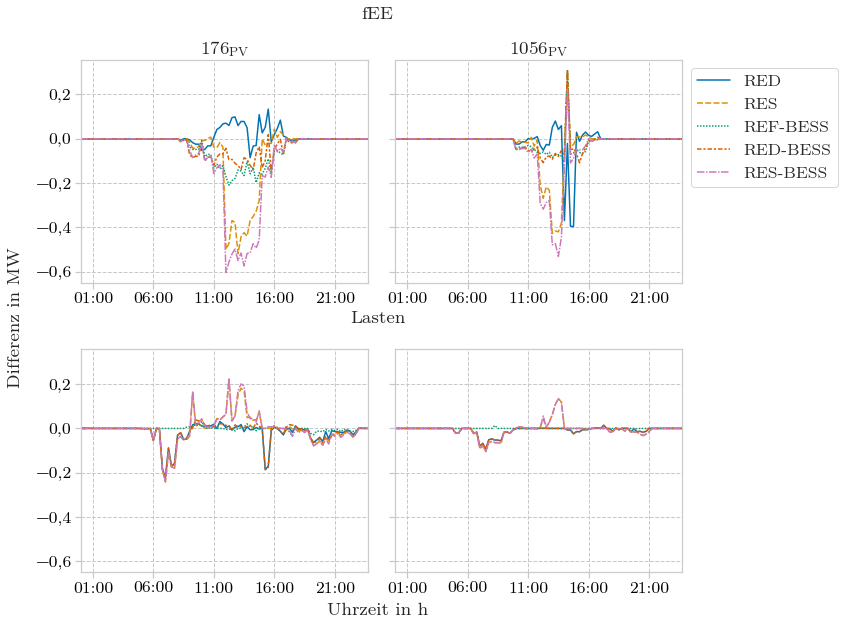

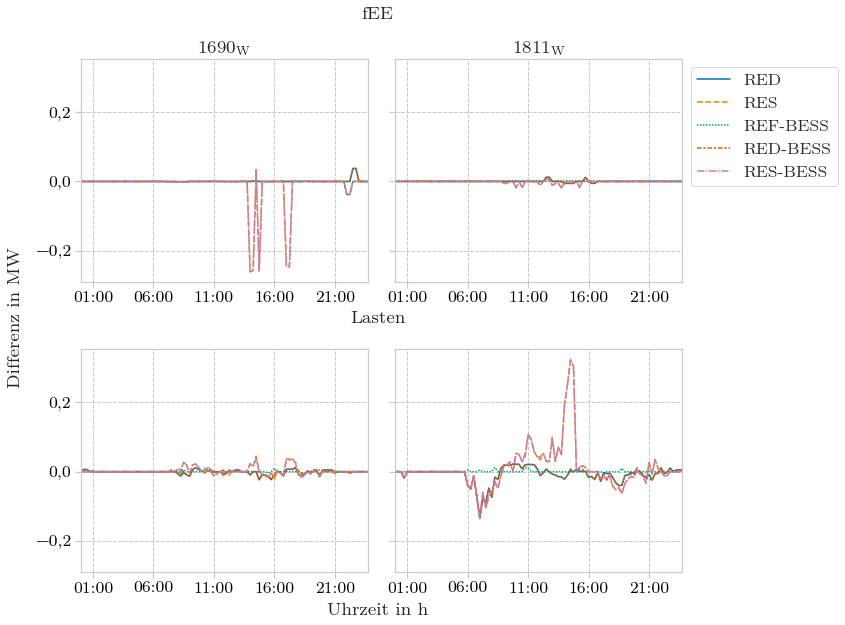

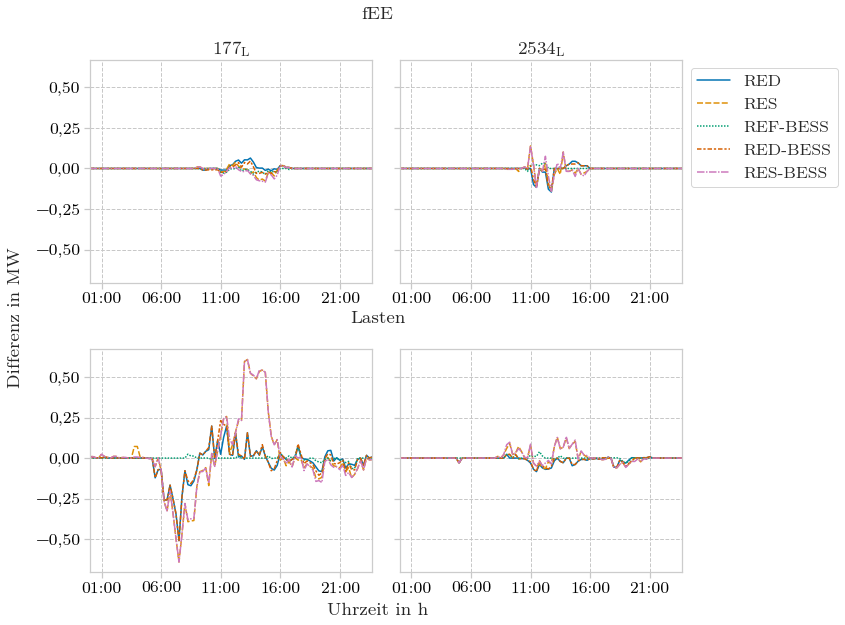

In [10]:
for kind, grid_ids in grid_pairs.items():
    fig, axs = fig, axs = plt.subplots(
        2,
        2,
        figsize=standard_sizes["a4landscape"],
        sharex=False,
        sharey=True,
    )
    
    for count, grid_id in enumerate(grid_ids):
        sns.lineplot(
            data=gen_diff_dict[grid_id],
            ax=axs[0][count]
        ).set_title(naming_dict[grid_id])
        
        axs[0][count].set_xlim(
            left=gen_diff_dict[grid_id].index[0],
            right=gen_diff_dict[grid_id].index[-1]
        )
        
        sns.lineplot(
            data=load_diff_dict[grid_id],
            ax=axs[1][count]
        )
        
        axs[1][count].set_xlim(
            left=load_diff_dict[grid_id].index[0],
            right=load_diff_dict[grid_id].index[-1]
        )
        
    for count_axs, ax in enumerate(axs):
        for count_ax, a in enumerate(ax):
            a.xaxis.set_major_locator(mdates.HourLocator(interval=5))
            a.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
            
            if count_axs == 0 and count_ax == 1:
                handles, labels = a.get_legend_handles_labels()
                labels = [legend_dict[label] for label in labels]

                a.legend(
                    handles=handles, labels=labels,
                    bbox_to_anchor=(1,1),
                    loc="upper left",
                )
            else:
                a.get_legend().remove()
    
    
    fig.text(0.43, 1., "fEE", ha="center")
    fig.text(0.43, 0.49, "Lasten", ha="center")
    fig.text(0.43, 0., "Uhrzeit in h", ha="center")
    fig.text(-0.01, 0.5, "Differenz in MW", va="center", rotation="vertical")
    
    plt.tight_layout()
    
    plt.subplots_adjust(hspace=.3)
    
    for kind in figure_export_as:
        plt.savefig(
            export_dir / export_name.format(
                export_dict[grid_id],
                kind,
            ),
            dpi=450, bbox_inches="tight")
    
    plt.show()
    

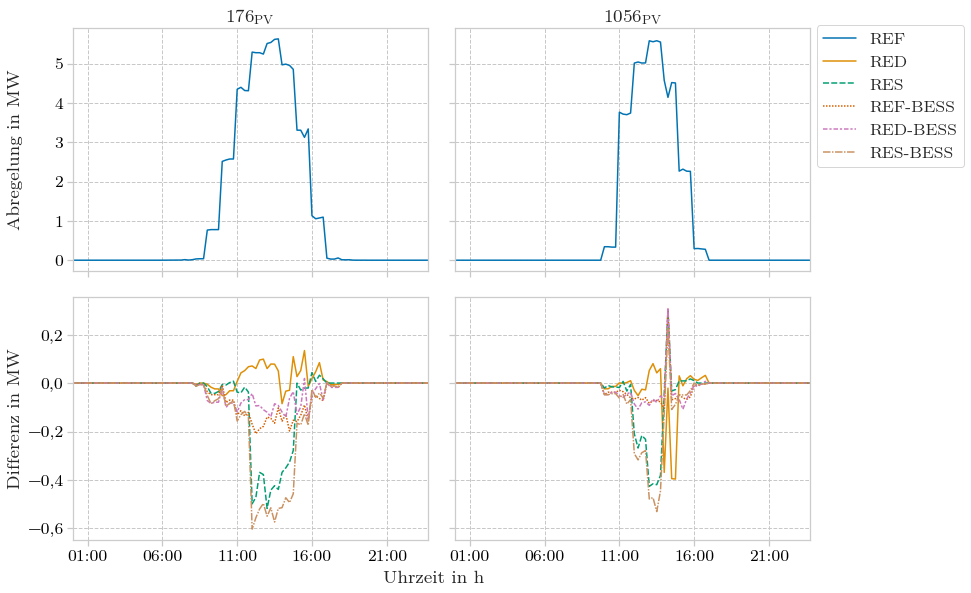

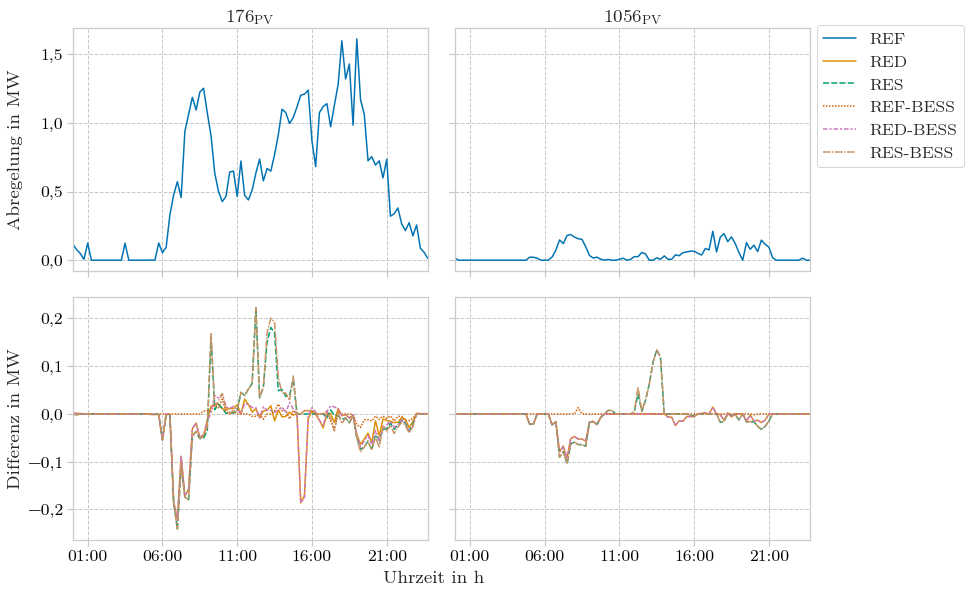

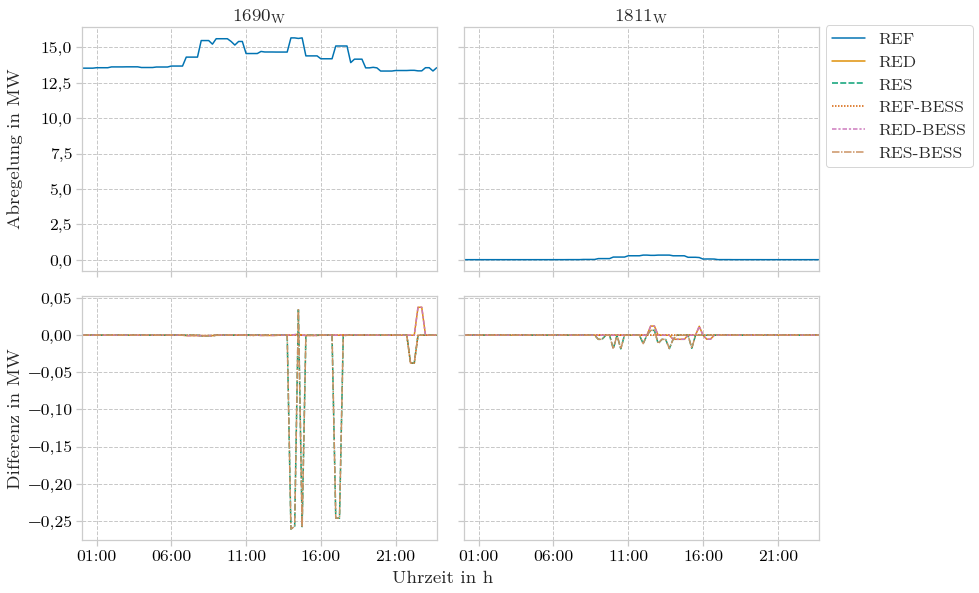

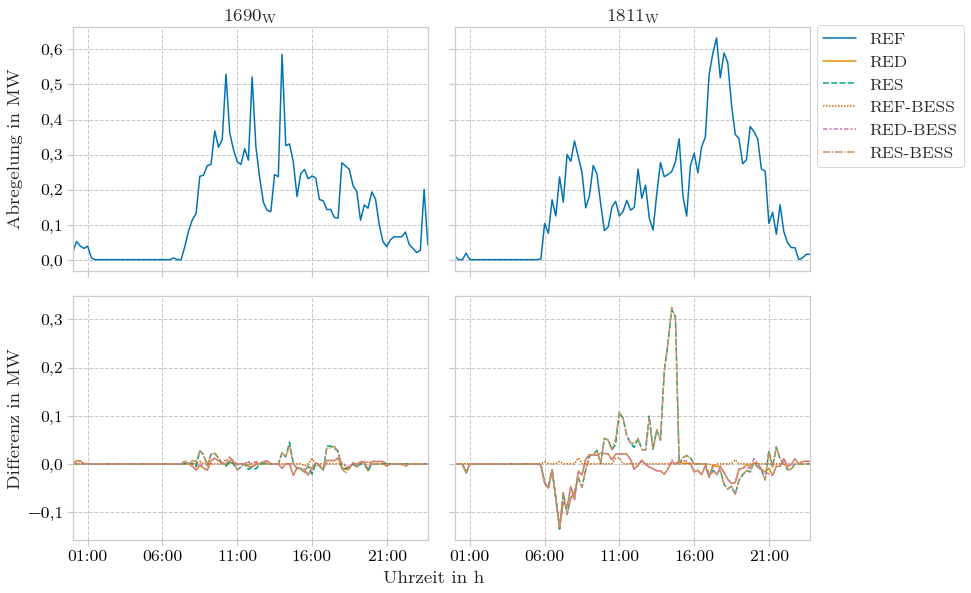

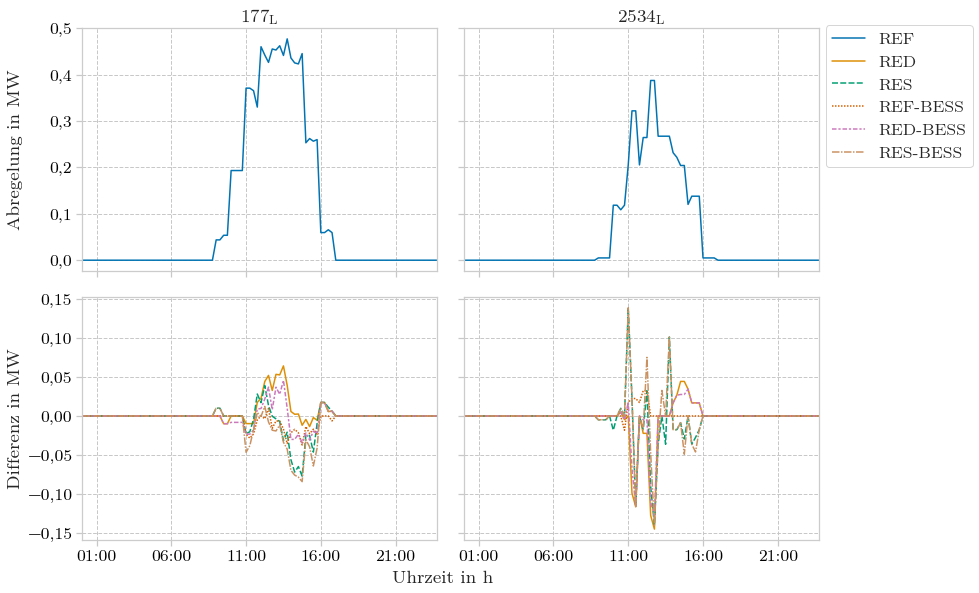

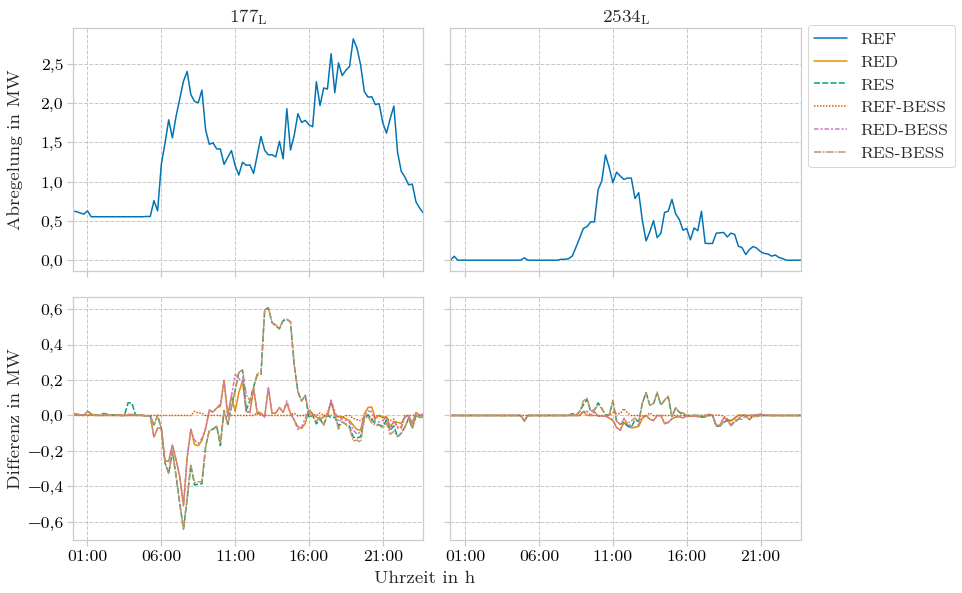

In [11]:
def generate_subplots_4(
    grid_ids,
    base_dict,
    diff_dict,
    export_name,
):
    fig, axs = fig, axs = plt.subplots(
        2,
        2,
        figsize=standard_sizes["a4landscape"],
        sharex="col",
        sharey="row",
    )
    
    for count, grid_id in enumerate(grid_ids):
        sns.lineplot(
            data=base_dict[grid_id],
            ax=axs[0][count]
        ).set_title(naming_dict[grid_id])
        
        axs[0][count].set_xlim(
            left=base_dict[grid_id].index[0],
            right=base_dict[grid_id].index[-1],
        )
        
        sns.lineplot(
            data=diff_dict[grid_id],
            ax=axs[1][count],
            palette=sns.color_palette("colorblind", n_colors=6)[1:]
        )
        
        if count == 0:
            axs[0][count].set_ylabel("Abregelung in MW")
            axs[1][count].set_ylabel("Differenz in MW")
        
    fig_handles = []
    fig_labels = []
        
    for count_axs, ax in enumerate(axs):
        for count_ax, a in enumerate(ax):            
            a.xaxis.set_major_locator(mdates.HourLocator(interval=5))
            a.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
            
            if count_ax == 1:                
                handles, labels = a.get_legend_handles_labels()
                labels = [legend_dict[label] for label in labels]
                
                fig_handles.extend(handles)
                fig_labels.extend(labels)
                
            a.get_legend().remove()
            
    leg = plt.figlegend(
        handles=fig_handles,
        labels=fig_labels,
        bbox_to_anchor=(0.975,0.95),
        loc="upper left",
    )
    
    fig.text(0.53, 0., "Uhrzeit in h", ha="center")

    fig.align_ylabels()
    
    plt.tight_layout()
    
    for kind in figure_export_as:
        plt.savefig(
            export_dir / export_name.format(
                export_dict[grid_id],
                kind,
            ),
            dpi=450,
            bbox_inches="tight")

    plt.show()
    

for kind, grid_ids in grid_pairs.items():
    generate_subplots_4(
        grid_ids,
        gen_base_dict,
        gen_diff_dict,
        export_name_2,
    )
        
    generate_subplots_4(
        grid_ids,
        load_base_dict,
        load_diff_dict,
        export_name_3,
    )    
